<a href="https://colab.research.google.com/github/Moysezg/Bondad-de-Ajuste-de-Chi-cuadrado/blob/main/PROYECTO_Trabajo_final_Brownianio_textil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> Movimiento browniano

La colección de variables aleatorias $X(t), t \geq 0$ es un **movimiento browniano** de parámetros $\mu$ y $\sigma^2$ si satisface:  

* $X(0)$ es una constante dada.

* Para todo $y$ y $t$ positivos, la variable aleatoria $X(t+y)-X(y)$ es independiente de los valores del proceso hasta el  tiempo $y$ y tiene una distribución normal con media $μt$ y varianza $t \sigma^2$

Comentarios.

* El proceso queda determinado solo por el valor presente y ninguno del pasado el que determina los valores futuros.
* $X(t)$ es, con probabilidad 1, una función continua de $t$.
* Pero no es diferenciable.
* EL movimiento browniano es el límite de modelos más simples, como las caminatas aleatorias (del modelo binomial).

### <font color='blue'> Movimiento Browniano Geometrico

Sea  $X(t), t \geq 0$ un movimiento browniano de parámetros $\mu$ y $\sigma^2$, y sea:
    
$$S(t)=e^{X(t)}, t \geq 0$$

El proceso $S(t), t \geq 0$ se dice que es un movimiento browniano geometrico con parámetros $\mu$ y $\sigma^2$.
    

Entonces:

$$\log \Bigg( \frac{S(t+y)}{S(y)} \Bigg)$$

es independiente del proceso y tiene distribución normal con media $\mu t$ y varianza $\sigma^2 t$.

#### Modelación de las acciones.

Si $P_t$ es el precio de una acción en el tiempo $t$, entonces el rendimiento logaritmizado
es $R_t = \log(\frac{P_t}{P_{t-1}})$, para $t=1,2,3...$ y normalmente ocurre que:

$$R_t \sim N(\mu, \sigma)$$

El uso del rendimiento logaritmizado se justifica como una buena aproximación:

$$R_t \approx \frac{P_t - P_{t-1}}{P_{t-1}}$$

debido a que el orden de los rendimientos es de $10^{-3}$ y se hace uso de $\log (1 + x) \approx x$.

Ahora, si se reescribe la cantidad $\frac{P_t}{P_0}$ como:

$$\frac{P_t}{P_0} = \frac{P_t}{P_{t-1}} \cdot \frac{P_{t-1}}{P_{t-2}} \cdot \frac{P_{t-2}}{P_{t-3}} \cdot ... \cdot \frac{P_2}{P_1} \cdot \frac{P_1}{P_0} $$

Al tomar el logaritmo:

$$\log( \frac{P_t}{P_0}) = R_t + R_{t-1} + ... + R_2 + R_1$$

Si suponemos que los rendimientos $R_i$ son independientes y tienen una misma distribución,
con $E[R_i]= \mu$ y $V[R_i]=\sigma^2$, entonces para $t$ grande, por el teorema central del límite esto
sigue una distribución normal (para más de 30 días) y se tendrá:

$$E \Bigg[\log \frac{P_t}{P_o} \Bigg]= E[R_t]+E[R_{t-1}]+...+E[R_1]= t\mu$$


$$V \Bigg[\log \frac{P_t}{P_o} \Bigg]= V[R_t]+V[R_{t-1}]+...+V[R_1]= t\sigma^2$$

Y se tendría que:

$$\log \Bigg( \frac{P_t}{P_0} \Bigg) \sim N(\mu t, \sigma \sqrt t)$$

Por lo que se puede escribir:

$$P_t=P_0 e^{\mu t +\sigma \beta_t}$$

donde $\beta_t$ es un movimiento browniano en $(0,t)$ y $E[\beta_t]=0$ y $V[\beta_t]=t$

Y la igualdad anterior también se puede escribir como:

$$P_t=P_0 e^{\mu t + \sigma \sqrt t z}$$

donde $z \sim N(0,1)$.

Esta última ecuación nos permite ya construir una simulación.

In [50]:
from random import gauss # Generar números aleatorios utilizando la distribución gaussiana (o distribución normal).
from math import exp #Calcular la función exponencial de un número.
import matplotlib.pyplot as plt #Graficar
from statsmodels.tsa.stattools import adfuller


#Definir Parámetros.

In [51]:
mu=0.001 #Tasa de crecimiento promedio o retorno esperado.
sigma=0.04  #Volatilidad o dispersión de los retornos.
p0=10 #Precio inicial o valor inicial.
t=30 #tiempo esperado 30 unidades.

#Se genera y devuelve una lista de valores que representan la trayectoria de un proceso de movimiento browniano discreto a lo largo del tiempo.


In [52]:
def trayectoria(mu,sigma,p0,t):
    l=[p0] #inicializa una lista llamada "l" con el valor inicial p0. Esta lista se utilizará para almacenar los valores de la trayectoria.
    pt=p0  #La variable "pt" se inicializa con el valor inicial p0. Representa el valor en el tiempo actual de la trayectoria.
    for i in range(t):
        pt=pt*exp(mu + sigma*gauss(0,1)) #Esto permite modelar el crecimiento y la volatilidad en el movimiento browniano.
        l.append(pt) #Valor de la trayectoria en cada tiempo.
    return l

In [53]:
l=trayectoria(mu, sigma,p0,t)

In [54]:
print(l)

[10, 10.254120861192927, 9.856665303099687, 9.5165914449264, 9.259501303967554, 8.584138394383393, 8.951026374967286, 7.999910755781514, 7.703448443891909, 7.724574917021605, 8.095760432747706, 7.797064935210981, 8.056309756395144, 7.869060032029628, 8.019539874239566, 8.28461994213249, 8.412083376093552, 8.451061064515825, 8.40876602155817, 8.759162095210982, 8.409730808276061, 8.252713046150093, 8.446387379660461, 8.00756366736802, 8.213553171412634, 8.740262212500836, 9.069955054024943, 8.82376273383312, 8.719103579678324, 8.99768297287697, 8.750149930796612]


#Se visualiza la evolución y la volatilidad del proceso y realizar análisis o inferencias adicionales sobre el mismo en 30 unidades de tiempo.

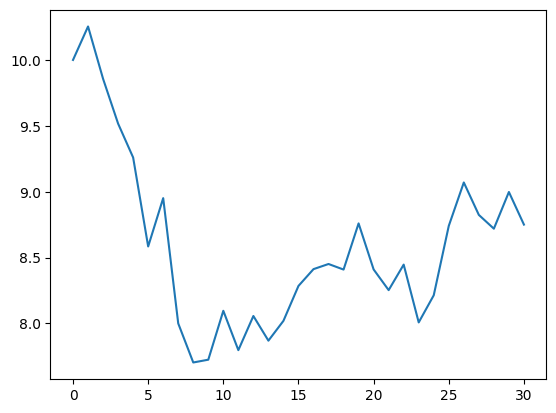

In [55]:

plt.plot(l)
plt.show()

In [56]:
mu=0.001
sigma=0.04
p0=10
t=200

##Realización de 10 pronosticos en 200 unidades de tiempo.



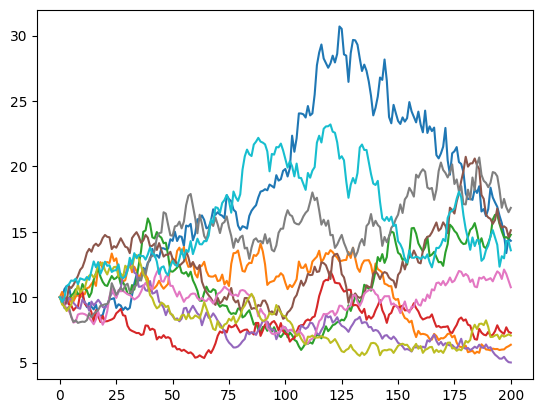

In [57]:
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

# Aquí inicia el proyecto
La idea del proyecto es tener una base de datos propia, ya sabemos como usar una base de datos de la nube de paginas que tengan este tipo de información con ayuda de a librería investpy.

Ahora generamos una base de datos propia en un excel, estos datos son valores reales históricos de la microempresa textil de mi familia, Subí los datos a Mega a Drive, y finalmente a Github, no pude leer los datos desde las primeras 2, no lo reconocían, a veces necesitaba actualizar la librería o instalar versiones pasadas, pero entraban en conflicto con otras librerías que también usaba, además en el drive tuve problemas con los permisos.

Finalmente use Github y desde ahí no hubo ningún problema, podría subirlo desde una dirección local de la computadora, pero eso hacia que no fuera replicable para cualquiera que intentara usar el código.

Usamos la prueba de la estimación del exponente de Hurst utilizando la librería 'hurst' y la prueba de ADF (Augmented Dickey-Fuller) utilizando la función 'adfuller' de la librería statsmodels.tsa.stattools.

Ambas pruebas son comunes en el análisis de series temporales y proporcionan información sobre las características y la estacionariedad de la serie.

La idea es probar que los datos siguen un movimiento Browniano.

#Definir librerias.

In [58]:
from statistics import mean,stdev,pstdev #Mean (media), stdev (desviación estándar) y pstdev (desviación estándar poblacional)
import pandas_datareader as pdr #Proporciona herramientas para extraer datos financieros de diversas fuentes en línea, como Yahoo Finance o Google Finance.
import pandas as pd #Sirve para análisis y manipulación de datos.
import matplotlib.pyplot as plt #Gráficps.
import numpy as np #Generar cálculos númericos.
from math import log #Logaritmo natural.

Cargamos los datos y los guardamos.

In [59]:
# URL del archivo Excel en GitHub
url = 'https://github.com/LopezPerezOlinT/SimulacionII/raw/main/Datos%20poblacionales%20y%20muestrales%20de%205%20a%C3%B1os.xlsx'

# Leer el archivo en un DataFrame de pandas
df = pd.read_excel(url, sheet_name='Ventas textil')

Podemos usar las funciones de Pandas para analizar los datos.

In [60]:
type(df) # Checamos el tipo de dato

pandas.core.frame.DataFrame

In [61]:
df.shape # Este es un atributo, no una función. Devuelve (número de renglones, número de columnas)

(52, 6)

In [62]:
df

,Semana,2018,2019,2020,2021,2022
0,1,8350,13900,98640,------,8890
1,2,8690,8610,10600,------,7870
2,3,10640,9870,93540,------,2540
3,4,11680,12870,2260,------,7980
4,5,10680,8030,9660,------,2650
5,6,11680,12780,8350,------,5370
6,7,10980,9730,9340,------,2650
7,8,12980,13120,10340,------,7320
8,9,12980,14520,10230,------,2180
9,10,13160,15310,9350,------,6370


Para determinar los valores adecuados de μ y σ basados en las ventas del 2019, es necesario realizar un análisis de los mismos y evaluar su comportamiento.

Simulación de la tendencia general: Para simular la tendencia general de las ventas a lo largo de los años, se cálcula el crecimiento promedio de las ventas y se utiliza como el valor de mu, para la desviación estándar de las ventas se utiliza como el valor de sigma. Estos valores reflejarán la tendencia y la volatilidad observadas en tus datos.

In [63]:
# Obtener los datos de ventas del DataFrame
ventas = df[2019].values

# Calcular el crecimiento promedio de las ventas
crecimiento_promedio = np.mean(np.diff(ventas) / ventas[:-1])

# Calcular la volatilidad de las ventas
volatilidad = np.std(np.diff(ventas) / ventas[:-1]) #se usa  para calcular las diferencias porcentuales entre las ventas de una semana y la siguiente

# Asignar los valores de mu y sigma
mu = crecimiento_promedio
sigma = volatilidad
print(mu)
print(sigma)

0.008407123703559661
0.18554433986564367


In [64]:
# Obtener los datos de ventas del DataFrame
ventas = df[2019].values
# Parámetros del movimiento browniano
p0 = ventas[0]
t = len(ventas)

In [65]:
# Función para simular el movimiento browniano
def trayectoria(mu, sigma, p0, t):
    l = [p0]
    pt = p0
    for i in range(t):
        pt = pt * np.exp(mu + sigma * np.random.normal(0, 1))
        l.append(pt)
    return l

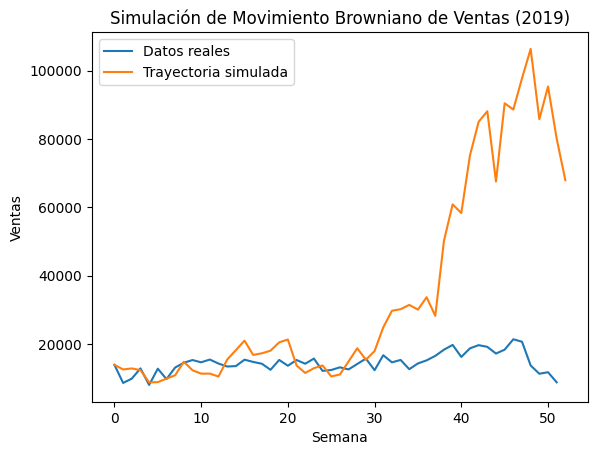

In [66]:
# Generar la trayectoria del movimiento browniano
trayectoria_ventas = trayectoria(mu, sigma, p0, t)

# Graficar la trayectoria simulada y los datos reales
plt.plot(ventas, label='Datos reales')
plt.plot(trayectoria_ventas, label='Trayectoria simulada')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Simulación de Movimiento Browniano de Ventas (2019)')
plt.legend()
plt.show()

In [67]:
# Obtener los datos de todas las columnas excepto la columna "Semana"
columnas = df.columns[1:]  # Obtener todas las columnas excepto la primera columna "Semana"
todos_los_datos = np.concatenate([df[columna].dropna().values for columna in columnas])

print(todos_los_datos)


[8350 8690 10640 11680 10680 11680 10980 12980 12980 13160 10680 14390
 12790 11860 15670 13640 13240 13460 11870 16890 12650 10650 11980 14980
 10680 1350 9520 10870 13880 12670 11460 14530 14380 13340 12820 14840
 18370 16340 19350 17650 14500 16840 16720 18740 16530 17550 19370 19430
 8890 17010 14220 13240 13900 8610 9870 12870 8030 12780 9730 13120 14520
 15310 14650 15460 14280 13420 13540 15420 14760 14230 12460 15340 13640
 15320 14230 15740 12130 12400 13180 12570 14160 15730 12340 16720 14640
 15340 12640 14320 15220 16530 18340 19740 16220 18740 19670 19170 17210
 18350 21390 20670 13720 11300 11750 8790 98640 10600 93540 2260 9660 8350
 9340 10340 10230 9350 11350 11870 '-----' '-----' '-----' '-----' '-----'
 '-----' '-----' '-----' '-----' '-----' '-----' '-----' '-----' '-----'
 '-----' '-----' '-----' '-----' '-----' '-----' '-----' '-----' '-----'
 '-----' '-----' '-----' '-----' '-----' '-----' '-----' '-----' '-----'
 '-----' '-----' '-----' '-----' '-----' '-----' '

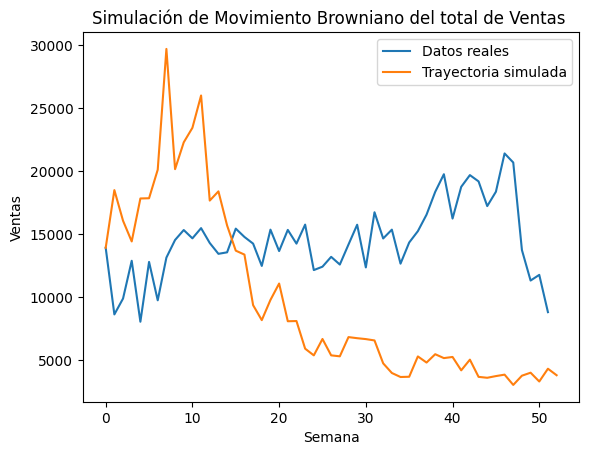

In [68]:
# Convertir los valores no numéricos a NaN
ventas_numericas = pd.to_numeric(ventas, errors='coerce')

# Filtrar los valores numéricos
ventas_filtradas = ventas_numericas[~np.isnan(ventas_numericas)]

# Parámetros del movimiento browniano
p0 = ventas_filtradas[0]
t = len(ventas_filtradas)

# Función para simular el movimiento browniano
def trayectoria(mu, sigma, p0, t):
    l = [p0]
    pt = p0
    for i in range(t):
        pt = pt * np.exp(mu + sigma * np.random.normal(0, 1))
        l.append(pt)
    return l

# Generar la trayectoria del movimiento browniano
trayectoria_ventas = trayectoria(mu, sigma, p0, t)

# Graficar la trayectoria simulada y los datos reales
plt.plot(ventas_filtradas, label='Datos reales')
plt.plot(trayectoria_ventas, label='Trayectoria simulada')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Simulación de Movimiento Browniano del total de Ventas ')
plt.legend()
plt.show()

In [69]:
# Función para simular el movimiento browniano
def trayectoria(mu, sigma, p0, t):
    l = [p0]
    pt = p0
    for i in range(t):
        pt = pt * np.exp(mu + sigma * np.random.normal(0, 1))
        l.append(pt)
    return l


El promedio de ventas es: 14504.038461538461


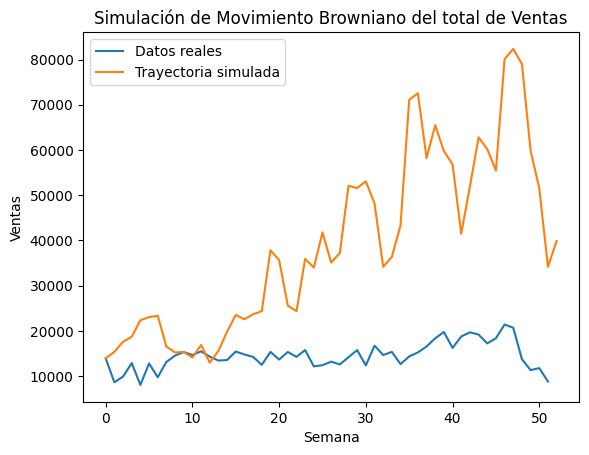

In [70]:
# Generar la trayectoria del movimiento browniano
trayectoria_ventas = trayectoria(mu, sigma, p0, t)

# Calcular el promedio de ventas
promedio_ventas = np.mean(ventas_filtradas)
print("El promedio de ventas es:", promedio_ventas)

# Graficar la trayectoria simulada y los datos reales
plt.plot(ventas_filtradas, label='Datos reales')
plt.plot(trayectoria_ventas, label='Trayectoria simulada')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Simulación de Movimiento Browniano del total de Ventas')
plt.legend()
plt.show()

In [71]:
print(df.head()) # La función head() muestra los primeros 5 renglones del data frame

   Semana   2018   2019   2020    2021  2022
0       1   8350  13900  98640  ------  8890
1       2   8690   8610  10600  ------  7870
2       3  10640   9870  93540  ------  2540
3       4  11680  12870   2260  ------  7980
4       5  10680   8030   9660  ------  2650


Generalmente, comenzamos a analizar un data frame conociendo su tamaño y la información que contiene.

In [72]:
df.columns # Da el nombre de las columnas

Index(['Semana', 2018, 2019, 2020, 2021, 2022], dtype='object')

Cada columna debe ser del mismo tipo, pero un renglón puede tener objetos de diferentes tipos.

In [73]:
df.dtypes # Da el tipo de objeto que guardan las columnas

Semana     int64
2018       int64
2019       int64
2020      object
2021      object
2022       int64
dtype: object

In [74]:
df.info() # Esta función da información más amplia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Semana  52 non-null     int64 
 1   2018    52 non-null     int64 
 2   2019    52 non-null     int64 
 3   2020    52 non-null     object
 4   2021    52 non-null     object
 5   2022    52 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.6+ KB


Podemos elegir columnas en particular para visualizar.

In [75]:
# Verificar los nombres de las columnas
print(df.columns)

Index(['Semana', 2018, 2019, 2020, 2021, 2022], dtype='object')


In [76]:
c_df=df[2018] # Elejimos la columna y la guardamos como una nueva variable

In [77]:
c_df.head() # mostramos los primeros 5 renglones

0     8350
1     8690
2    10640
3    11680
4    10680
Name: 2018, dtype: int64

In [78]:
c_df.tail() # mostramos los últimos 5 renglones

47    19430
48     8890
49    17010
50    14220
51    13240
Name: 2018, dtype: int64

In [79]:
o_df = df[2019] # También podemos elegir la columna nombrandola directamente

In [80]:
o_df.head()

0    13900
1     8610
2     9870
3    12870
4     8030
Name: 2019, dtype: int64

In [81]:
subset=df[[2018,2019]] # Para especificar varias columnas usamos corchetes dobles

In [82]:
subset.head()

,2018,2019
0,8350,13900
1,8690,8610
2,10640,9870
3,11680,12870
4,10680,8030


In [83]:
subset.head(n=10) # podemos ver más renglones

,2018,2019
0,8350,13900
1,8690,8610
2,10640,9870
3,11680,12870
4,10680,8030
5,11680,12780
6,10980,9730
7,12980,13120
8,12980,14520
9,13160,15310


In [84]:
subset.tail() #Los últimos datos de las columnas que elegimos

,2018,2019
47,19430,20670
48,8890,13720
49,17010,11300
50,14220,11750
51,13240,8790


In [85]:
subset # se puede imprimir todo

,2018,2019
0,8350,13900
1,8690,8610
2,10640,9870
3,11680,12870
4,10680,8030
5,11680,12780
6,10980,9730
7,12980,13120
8,12980,14520
9,13160,15310


In [86]:
subset.iloc[1] # revisar: iloc, loe

2018    8690
2019    8610
Name: 1, dtype: int64

In [87]:
df[20:25][2019] #aquí podemos seleccionar que filas y de que columna mostrar los datos

20    13640
21    15320
22    14230
23    15740
24    12130
Name: 2019, dtype: int64

Podemos graficar los precios y calcular las estadisticas de los rendimientos logaritmizados

0      8350
1      8690
2     10640
3     11680
4     10680
5     11680
6     10980
7     12980
8     12980
9     13160
10    10680
11    14390
12    12790
13    11860
14    15670
15    13640
16    13240
17    13460
18    11870
19    16890
20    12650
21    10650
22    11980
23    14980
24    10680
25     1350
26     9520
27    10870
28    13880
29    12670
30    11460
31    14530
32    14380
33    13340
34    12820
35    14840
36    18370
37    16340
38    19350
39    17650
40    14500
41    16840
42    16720
43    18740
44    16530
45    17550
46    19370
47    19430
48     8890
49    17010
50    14220
51    13240
Name: 2018, dtype: int64


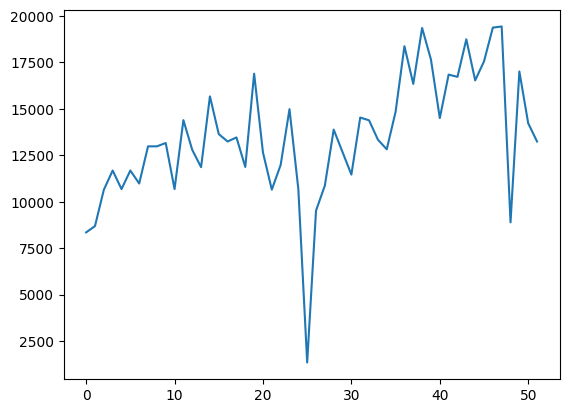


 El rendimiento medio es: 0.13025611553218727,
 La desviación muestral es: 1.0043921546778067 
 La desviación poblacional es: 0.9944964241392782


In [88]:
# Leer el archivo de datos desde tu Excel
datos = pd.read_excel('https://github.com/LopezPerezOlinT/SimulacionII/raw/main/Datos%20poblacionales%20y%20muestrales%20de%205%20a%C3%B1os.xlsx', sheet_name='Ventas textil')

# Seleccionar las columnas y convertirlas en una serie de tiempo
ts = datos[2018]

# Imprimir los valores de la serie de tiempo
print(ts)

# Crear una lista vacía para los precios
lp = []

# Agregar los valores de la serie de tiempo a la lista
for i in range(len(ts)):
    lp.append(ts.iloc[i])

# Graficar los precios
plt.plot(lp)
plt.show()

# Calcular los rendimientos
lr = []

# Calcular los rendimientos utilizando la fórmula correspondiente
for i in range(1, len(lp)):
    lr.append((lp[i - 1] / lp[i]) - 1)

# Calcular el rendimiento medio y las desviaciones
print(f"\n El rendimiento medio es: {mean(lr)},\n La desviación muestral es: {stdev(lr)} \n La desviación poblacional es: {pstdev(lr)}")

El rendimiento medio es 0.13025611553218727, lo que significa que, en promedio, los precios de cierre aumentaron en un 13.03% entre periodos sucesivos.

La desviación muestral es 1.0043921546778067, lo que indica que los rendimientos individuales pueden variar alrededor de 1 unidad con respecto al rendimiento medio.

la desviación poblacional es 0.9944964241392782, lo que indica que los rendimientos individuales pueden variar alrededor de 0.99 unidades con respecto al rendimiento medio.

Y podemos visualizar el rendimiento

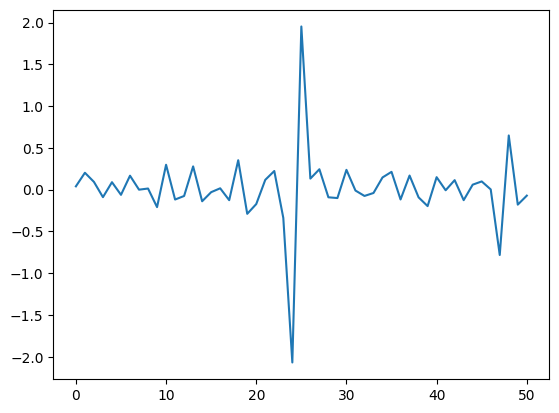

0.009038843365609759 0.45430862119151694


In [89]:
lr=[]
for i in range(1,len(lp)):
    lr.append(log(lp[i]/lp[i-1]))
plt.plot(lr)
plt.show()
print(mean(lr), stdev(lr))


La media de los rendimientos logarítmicos es 0.009038843365609759, lo que significa que, en promedio, los precios de cierre aumentaron un 0.9% entre periodos sucesivos, considerando los cambios porcentuales expresados en términos logarítmicos.

La desviación estándar de los rendimientos logarítmicos es 0.45430862119151694, lo que indica que los cambios porcentuales de los precios de cierre pueden variar alrededor de 0.45 unidades con respecto a la media.

Y graficarlos juntos, mostrará las fluctuaciones en los mismos puntos

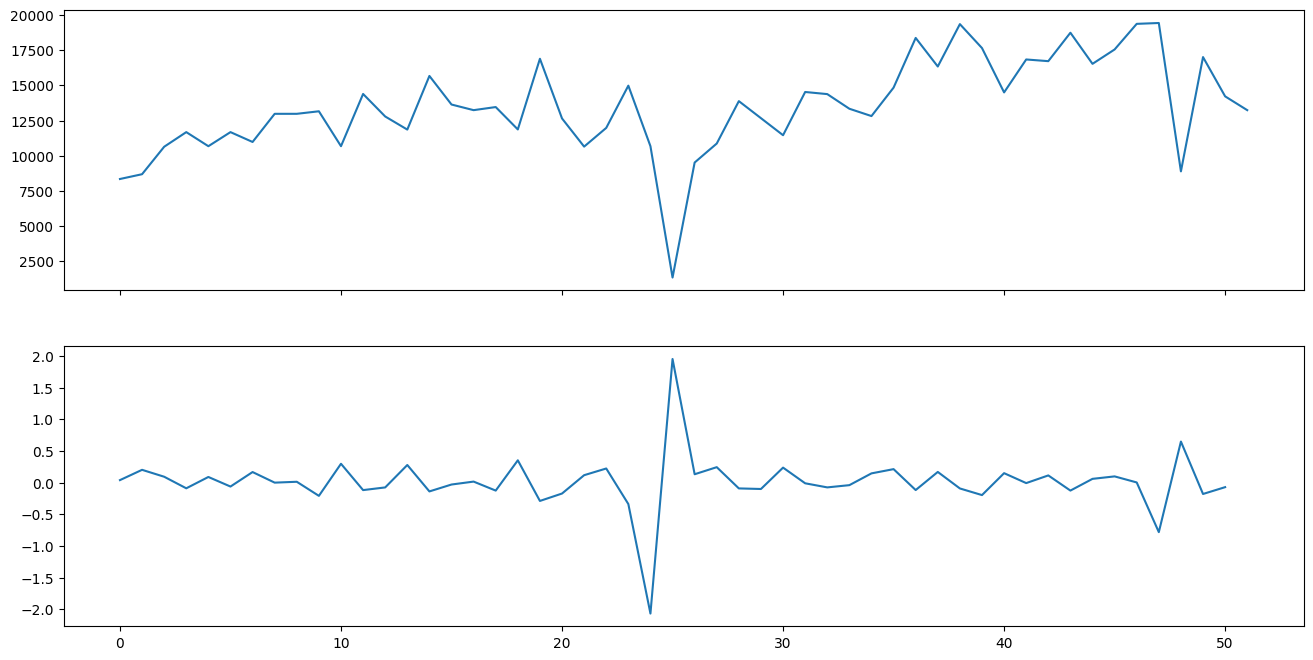

In [90]:
fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)

En el primer subplot (ax[0]), se grafica la serie de tiempo de los precios (lp). Esta gráfica mostrará cómo varían los precios a lo largo del tiempo. Pueden ayudar a visualizar la tendencia, los picos y valles, y la volatilidad de los precios en el período de tiempo analizado.

En el segundo subplot (ax[1]), se grafican los rendimientos (lr). Los rendimientos representan los cambios porcentuales en los precios entre un período y el siguiente. Esta gráfica puede ayudar a observar la volatilidad relativa de los rendimientos y cómo se comparan con los cambios en los precios. Los rendimientos reflejan las variaciones porcentuales en los precios, por lo que una mayor amplitud en la gráfica indica una mayor volatilidad en los retornos.

Ahora para el año 2018 y 2019

Valores de la serie de tiempo combinada:
0      8350
1      8690
2     10640
3     11680
4     10680
      ...  
47    20670
48    13720
49    11300
50    11750
51     8790
Length: 104, dtype: int64


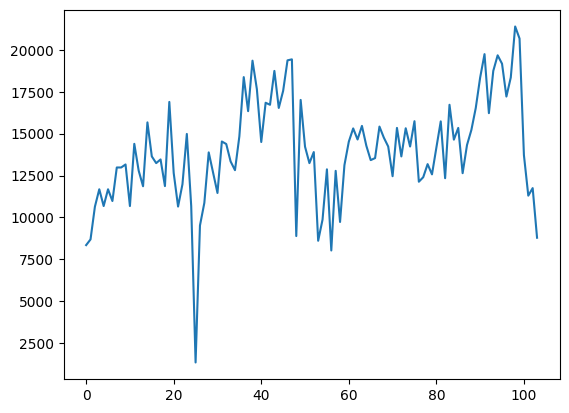


 Rendimientos para ambos años:
 El rendimiento medio es: 0.07136402844604856
 La desviación muestral es: 0.6345068310563655
 La desviación poblacional es: 0.6314191882510282


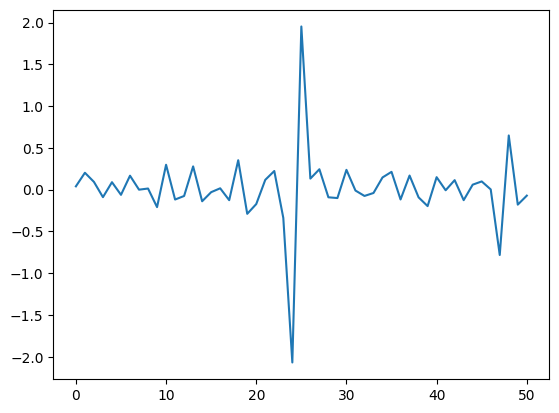


 Rendimientos para los años 2018 y 2019:
 El rendimiento medio es: 0.009038843365609759
 La desviación muestral es: 0.45430862119151694


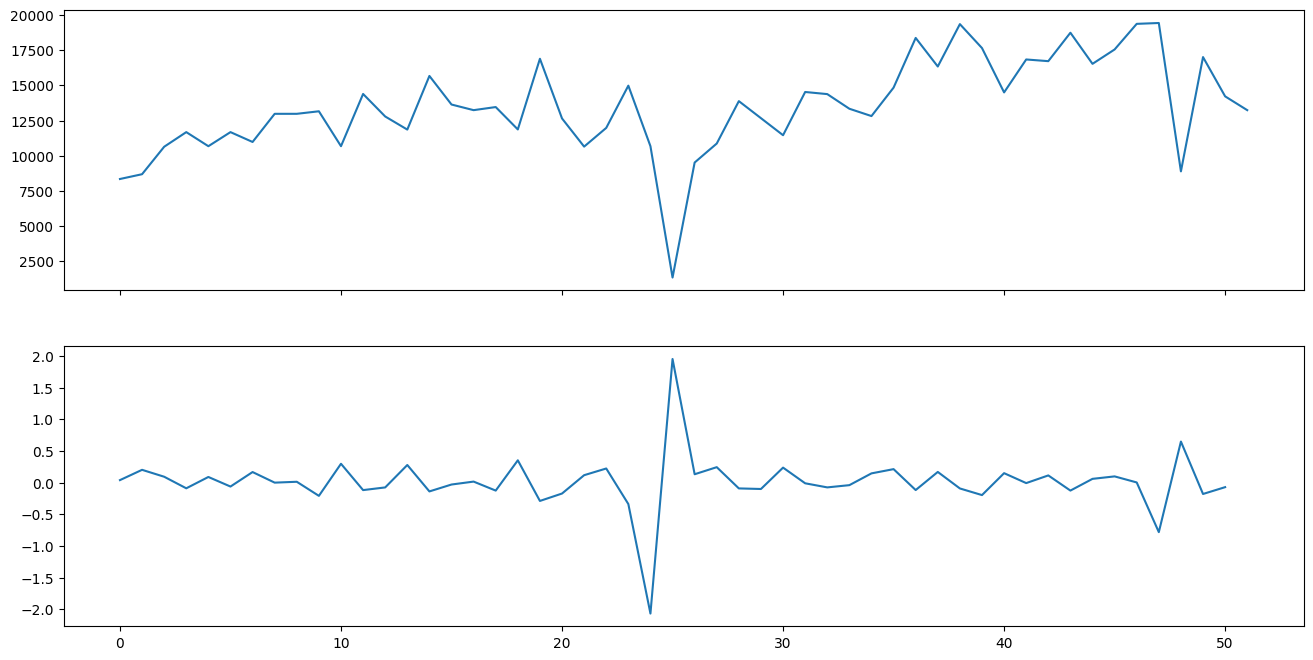

In [91]:
# Leer el archivo de datos desde tu Excel
datos = pd.read_excel('https://github.com/LopezPerezOlinT/SimulacionII/raw/main/Datos%20poblacionales%20y%20muestrales%20de%205%20a%C3%B1os.xlsx', sheet_name='Ventas textil')

# Seleccionar las columnas y convertirlas en una serie de tiempo
ts_2018 = datos[2018]
ts_2019 = datos[2019]

# Concatenar las series de tiempo de ambos años
ts_combined = pd.concat([ts_2018, ts_2019])

# Imprimir los valores de la serie de tiempo combinada
print("Valores de la serie de tiempo combinada:")
print(ts_combined)

# Crear una lista vacía para los precios
lp_combined = []

# Agregar los valores de la serie de tiempo combinada a la lista
for i in range(len(ts_combined)):
    lp_combined.append(ts_combined.iloc[i])

# Graficar los precios
plt.plot(lp_combined)
plt.show()

# Calcular los rendimientos
lr_combined = []

# Calcular los rendimientos utilizando la fórmula correspondiente
for i in range(1, len(lp_combined)):
    lr_combined.append((lp_combined[i] / lp_combined[i-1]) - 1)

# Calcular el rendimiento medio y las desviaciones
print(f"\n Rendimientos para ambos años:")
print(f" El rendimiento medio es: {mean(lr_combined)}")
print(f" La desviación muestral es: {stdev(lr_combined)}")
print(f" La desviación poblacional es: {pstdev(lr_combined)}")

# Calcular los rendimientos utilizando la fórmula correspondiente para 2018 y 2019
lr = []
for i in range(1, len(lp)):
    lr.append(log(lp[i] / lp[i-1]))

# Graficar los rendimientos
plt.plot(lr)
plt.show()

# Calcular el rendimiento medio y las desviaciones para 2018 y 2019
print(f"\n Rendimientos para los años 2018 y 2019:")
print(f" El rendimiento medio es: {mean(lr)}")
print(f" La desviación muestral es: {stdev(lr)}")

fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)


El rendimiento medio es 0.07770303108013851, lo que significa que, en promedio, los precios de cierre aumentaron en un 7.77% entre periodos sucesivos.

La desviación muestral es 0.7197216414402019, lo que indica que los rendimientos individuales pueden variar alrededor de 0.72 unidad con respecto al rendimiento medio.

la desviación poblacional es 0.7162193255638878, lo que indica que los rendimientos individuales pueden variar alrededor de 0.99 unidades con respecto al rendimiento medio.

LAs otras gráficas son exactamente iguales a las anteriores esto se debe a la similitud de los datos y que la mitad de ellos son los mismos de las graficas anteriores

Verificación de que es un movimiento Brawniano. Prueva de Dickey-Fouller

In [92]:
!pip install hurst

In [93]:
# Importar la librería necesaria
from hurst import compute_Hc

# Calcular el exponente de Hurst
H, c, data = compute_Hc(lr_combined)
print("Hurst Exponent:", H)


Hurst Exponent: 0.5715462675239624


Teniendo en cuenta que un exponente de Hurst de 0.5 representa una serie de tiempo aleatoria, mientras que valores por encima de 0.5 indican una mayor persistencia y valores por debajo de 0.5 indican una reversión a la media.

En tu caso, con un exponente de Hurst de aproximadamente 0.57, los datos muestran cierta tendencia o dependencia a largo plazo, aunque no de manera muy fuerte. Es importante considerar otros análisis y criterios para obtener una conclusión más sólida sobre si los datos siguen un proceso de movimiento browniano.

In [94]:
!pip install statsmodels

In [95]:
# Prueba ADF
result = adfuller(lr_combined)
print("\n Prueba ADF:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])


 Prueba ADF:
ADF Statistic: -11.736541790835036
p-value: 1.303656234501898e-21


El p-value es extremadamente pequeño, lo que indica que los rendimientos son estacionarios y no tienen una tendencia determinista. En otras palabras, los datos de los rendimientos exhiben características estacionarias y no muestran una tendencia a largo plazo.

Esto respalda la idea de que los datos de los rendimientos podrían ser consistentes con un movimiento browniano, que es un proceso estocástico que exhibe propiedades estacionarias y no tiene una dirección o tendencia determinista.

Suponemos que es Brawniano, entonces vamos a pronosticar la venta de los siguientes años

Ventas simuladas para 2020 y 2021:
            2020          2021
0   11191.213582  16128.179810
1   11030.526808  17983.651244
2    8820.215785  16873.797702
3    8846.476766  22758.016463
4    8843.730142   8790.000000
5    8837.043069   8790.000000
6    8849.867035   8790.000000
7    8897.300141   8790.000000
8    8897.921957   8790.000000
9    8889.801286   8790.000000
10   8866.161634   8790.000000
11   8940.960781   8790.000000
12   8894.864291   8790.000000
13   8890.703347   8790.000000
14   8823.315586   8790.000000
15   8813.184015   8790.000000
16   8833.298620   8790.000000
17   8827.509987   8790.000000
18   8818.672476   8790.000000
19   8838.395923   8790.000000
20   8852.694383   8790.000000
21   8804.445616   8790.000000
22   8798.515494   8790.000000
23   8796.808809   8790.000000
24   8798.297933   8790.000000
25   8807.369860   8790.000000
26   8813.218316   8790.000000
27   8813.716352   8790.000000
28   8804.134235   8790.000000
29   8795.993227   8790.000000
30  

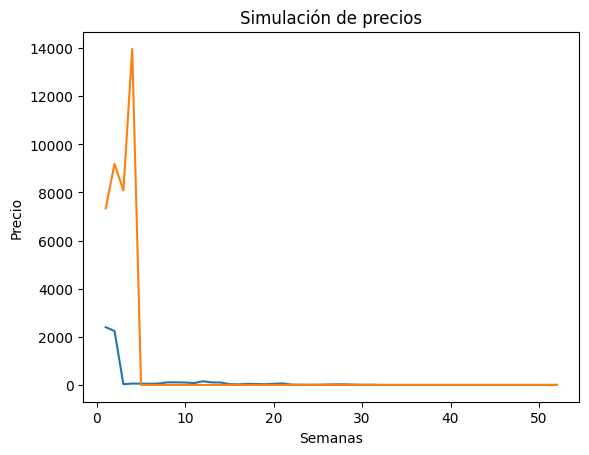

In [96]:
# Parámetros de la simulación
precio_inicial = lp_combined[-1]  # Precio final de los datos combinados
media_rendimientos = mean(lr_combined)
desviacion_rendimientos = stdev(lr_combined)
semanas_simulacion = 52  # Un año (2020 o 2021) considerando semanas

# Generar los rendimientos simulados
rendimientos_simulados = np.random.normal(media_rendimientos, desviacion_rendimientos, (semanas_simulacion, 2))

# Calcular los precios simulados
precios_simulados = [precio_inicial]
for i in range(semanas_simulacion):
    precio_siguiente = precios_simulados[-1] * (1 + rendimientos_simulados[i])
    precio_siguiente = np.where(precio_siguiente < 0, 0, precio_siguiente)  # Evitar ventas negativas
    precios_simulados.append(precio_siguiente)

# Verificar la longitud de los precios simulados
precios_simulados = precios_simulados[1:]  # Eliminar el primer elemento (precio inicial)

# Crear una tabla de ventas simuladas para los años 2020 y 2021
ventas_simuladas = pd.DataFrame(columns=['2020', '2021'])
for i in range(semanas_simulacion):
    venta_2020 = precios_simulados[i][0] + lp_combined[-1]
    venta_2021 = precios_simulados[i][1] + lp_combined[-1]
    ventas_simuladas.loc[i] = [venta_2020, venta_2021]

# Mostrar la tabla de ventas simuladas
print('Ventas simuladas para 2020 y 2021:')
print(ventas_simuladas)

# Graficar los precios simulados
semanas = range(1, semanas_simulacion + 1)
plt.plot(semanas, precios_simulados)
plt.xlabel('Semanas')
plt.ylabel('Precio')
plt.title('Simulación de precios')
plt.show()


0      8890
1      7870
2      2540
3      7980
4      2650
5      5370
6      2650
7      7320
8      2180
9      6370
10     2970
11     5760
12     2350
13    73240
14     2370
15     6870
16     3670
17     4690
18     3870
19     5460
20     3650
21     4320
22     4640
23     3570
24     3420
25     3780
26     4380
27     4980
28     4340
29     5300
30     5490
31     6370
32     7320
33     8340
34     7630
35     8320
36     4190
37     6980
38     6790
39     6490
40     6790
41     7300
42     7200
43     7500
44     7280
45    11400
46    18763
47    11500
48     7070
49     4340
50    12450
51    14410
Name: 2022, dtype: int64


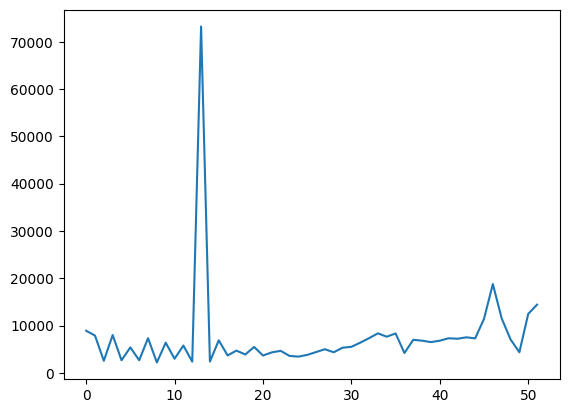


 El rendimiento medio es: 0.7218962676556546
 La desviación muestral es: 4.186325536470344
 La desviación poblacional es: 4.186325536470344

 La media de los datos del año 2022 es: 7526.403846153846
 La desviación estándar de los datos del año 2022 es: 9724.189324050883


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo de datos desde el Excel
datos = pd.read_excel('https://github.com/LopezPerezOlinT/SimulacionII/raw/main/Datos%20poblacionales%20y%20muestrales%20de%205%20a%C3%B1os.xlsx', sheet_name='Ventas textil')

# Seleccionar las columnas y convertirlas en una serie de tiempo
ts = datos[2022]

# Imprimir los valores de la serie de tiempo
print(ts)

# Crear una lista vacía para los precios
lp = []

# Agregar los valores de la serie de tiempo a la lista
for i in range(len(ts)):
    lp.append(ts.iloc[i])

# Graficar los precios
plt.plot(lp)
plt.show()

# Calcular los rendimientos
lr = []

# Calcular los rendimientos utilizando la fórmula correspondiente
for i in range(1, len(lp)):
    lr.append((lp[i - 1] / lp[i]) - 1)

# Calcular el rendimiento medio y las desviaciones
rendimiento_medio = np.mean(lr)
desviacion_muestral = np.std(lr)
desviacion_poblacional = np.std(lr, ddof=0)

# Imprimir la media y desviación estándar de los datos del año 2022
print(f"\n El rendimiento medio es: {rendimiento_medio}")
print(f" La desviación muestral es: {desviacion_muestral}")
print(f" La desviación poblacional es: {desviacion_poblacional}")

# Calcular la media y la desviación estándar de los datos del año 2022
media_datos = np.mean(ts)
desviacion_estandar_datos = np.std(ts)

# Imprimir la media y la desviación estándar de los datos
print(f"\n La media de los datos del año 2022 es: {media_datos}")
print(f" La desviación estándar de los datos del año 2022 es: {desviacion_estandar_datos}")


# Conclución
Podemos observar que de los datos reales la media es de 7526, mientras que del pronostico se espera 8790 aproximadamente, no esta muy alejado de los datos, y esos datos de la simulación, llenan el hueco de los datos durante el tiempo de pandemia.